# 1. Data Input

In [6]:
# Import required libraries
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Function to read data
def load_data(file_path):
    """
    Reads data from a CSV file and returns a pandas DataFrame.

    Parameters:
    file_path (str): Path to the CSV file.

    Returns:
    DataFrame: Loaded data as pandas DataFrame.
    """
    try:
        data = pd.read_csv(file_path)
        print("Data Loaded Successfully!")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")

# Load the dataset using the uploaded file
df = load_data(file_name)

# Display first 5 rows
df.head()


Saving Iris (1).csv to Iris (1).csv
Data Loaded Successfully!


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Data Processing

In [7]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop unnecessary columns
df = df.drop('Id', axis=1)

# Encode categorical target variable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

print("Processed Data Sample:\n", df.head())


Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Processed Data Sample:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


# 3. Model Development

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# 4. Results Presentation

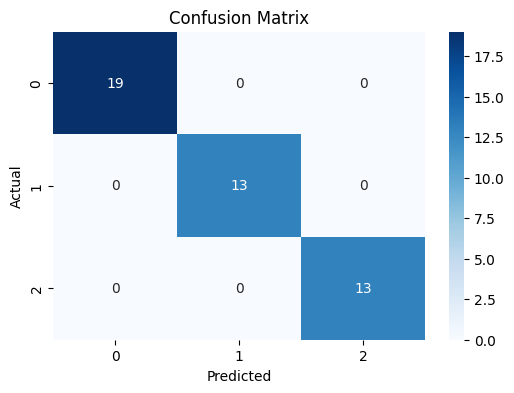

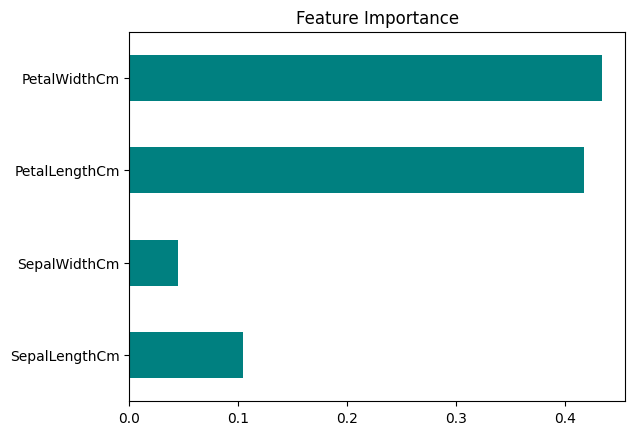

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.show()


# 5. User Interaction(Simple Command-Line Interface)

In [10]:
def user_interface():
    """
    Simple user interface for model prediction.
    """
    print("Welcome to the Iris Flower Prediction App!")
    print("Please enter the flower's features below:")

    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))

    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

    prediction = model.predict(input_data)
    species = encoder.inverse_transform(prediction)

    print(f"\nThe predicted species is: {species[0]}")

# Run the user interface
user_interface()


Welcome to the Iris Flower Prediction App!
Please enter the flower's features below:
Sepal Length (cm): 5
Sepal Width (cm): 6
Petal Length (cm): 7
Petal Width (cm): 8

The predicted species is: Iris-virginica
